In [7]:
import numpy as np
import pandas as pd
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt

from cointanalysis import CointAnalysis

# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

In [8]:
def fetch_etf(ticker):
    return DataReader(ticker, 'yahoo', '2012-01-01', '2018-12-31')['Adj Close']

In [9]:
hyg = fetch_etf('HYG')
bkln = fetch_etf('BKLN')

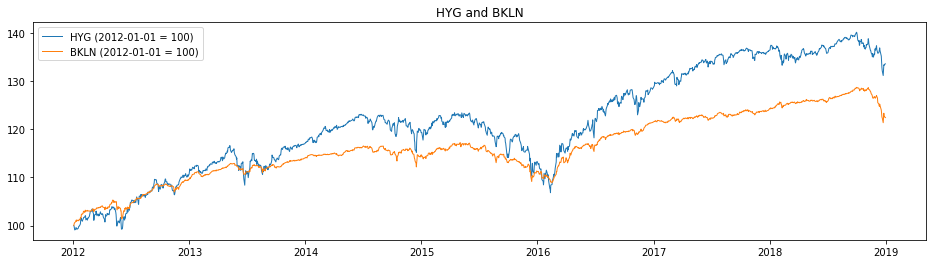

In [20]:
plt.figure(figsize=(16, 4))

plt.title('HYG and BKLN')
hyg_norm = 100 * hyg / hyg[0]
bkln_norm = 100 * bkln / bkln[0]
plt.plot(hyg_norm, label='HYG (2012-01-01 = 100)', linewidth=1)
plt.plot(bkln_norm, label='BKLN (2012-01-01 = 100)', linewidth=1)

plt.legend()
plt.show()

In [11]:
coint = CointAnalysis()

X = np.stack([hyg, bkln], axis=1)

In [17]:
pvalue = coint.test(X).pvalue_
print(f'pvalue: {100 * pvalue:.2f}%')

pvalue: 0.55%


In [18]:
spread = pd.Series(coint.fit_transform(X), index=hyg.index)
print(f'coef: {coint.coef_}')
print(f'mean: {coint.mean_}')
print(f'std: {coint.std_}')

coef: [-0.18105882  1.        ]
mean: 6.969916306145498
std: 0.1528907317256263


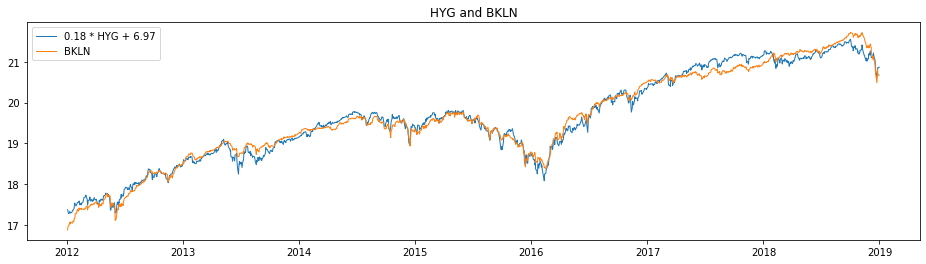

In [23]:
plt.figure(figsize=(16, 4))

hyg_adj = (-coint.coef_[0]) * hyg + coint.mean_

plt.title('HYG and BKLN')
plt.plot(hyg_adj, label=f'{-coint.coef_[0]:.2f} * HYG + {coint.mean_:.2f}', linewidth=1)
plt.plot(bkln, label='BKLN', linewidth=1)

plt.legend()
plt.show()

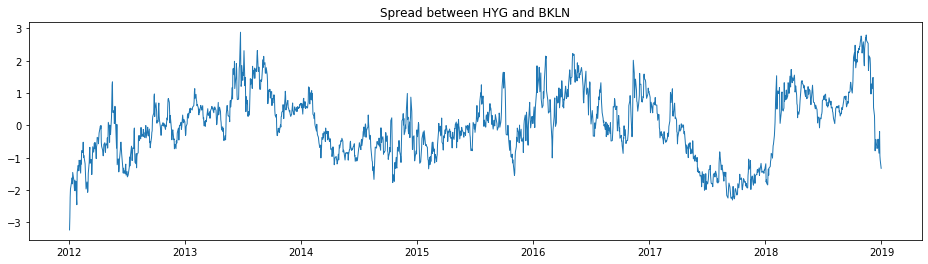

In [25]:
plt.figure(figsize=(16, 4))

plt.title('Spread between HYG and BKLN')
plt.plot(spread, linewidth=1)

plt.show()